In [2]:
from google.colab import files
uploaded = files.upload()

Saving Av7 - Afterlife1.wav to Av7 - Afterlife1 (1).wav


BAND pass

filter bandpass IIR Bessel

Sample rate: 44100
Data type: int16
Data shape: (1658206, 2)


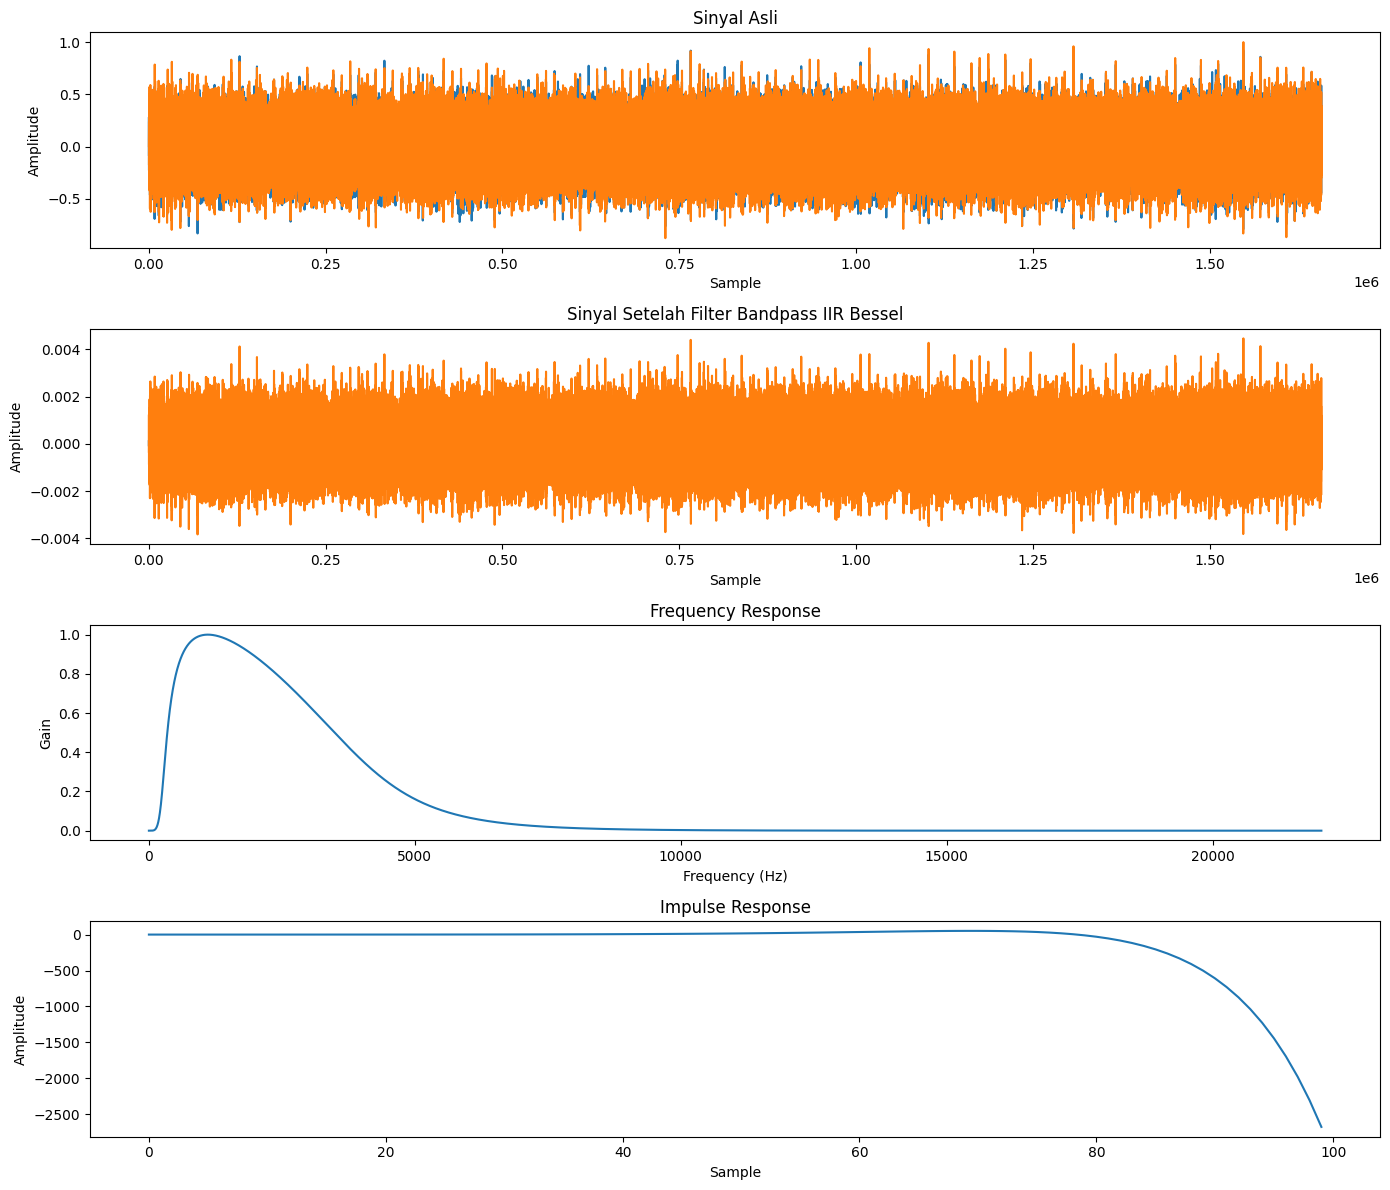

In [9]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_IIRBessel.wav'
fs, data = wavfile.read(input_wav_path)

# Verifikasi data asli
print("Sample rate:", fs)
print("Data type:", data.dtype)
print("Data shape:", data.shape)

# Normalisasi data jika perlu
data = data.astype(np.float32)
data /= np.max(np.abs(data))

# Desain filter IIR bandpass Bessel
order = 5  # Orde filter
low_cutoff_freq = 300  # Frekuensi cutoff bawah dalam Hz
high_cutoff_freq = 4000  # Frekuensi cutoff atas dalam Hz
nyquist = 0.5 * fs  # Frekuensi Nyquist
low_normalized_cutoff = low_cutoff_freq / nyquist
high_normalized_cutoff = high_cutoff_freq / nyquist

# Dapatkan koefisien filter bandpass IIR Bessel
b, a = signal.bessel(order, [low_normalized_cutoff, high_normalized_cutoff], btype='band', analog=False, norm='phase')

# Respon impuls dari filter
impulse_response = signal.impulse((b, a))

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(b, a, data)

# Konversi kembali ke format int16 dengan penyesuaian skala
filtered_data_int16 = np.int16(filtered_data * 32767)

# Simpan hasil sinyal terfilter ke file WAV
wavfile.write(output_wav_path, fs, filtered_data_int16)

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 12))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter Bandpass IIR Bessel')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Frequency response
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(4, 1, 3)
plt.plot(0.5 * fs * w / np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

# Impulse response
plt.subplot(4, 1, 4)
plt.plot(impulse_response[1])
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


**FIR JENDELA HAMMING**


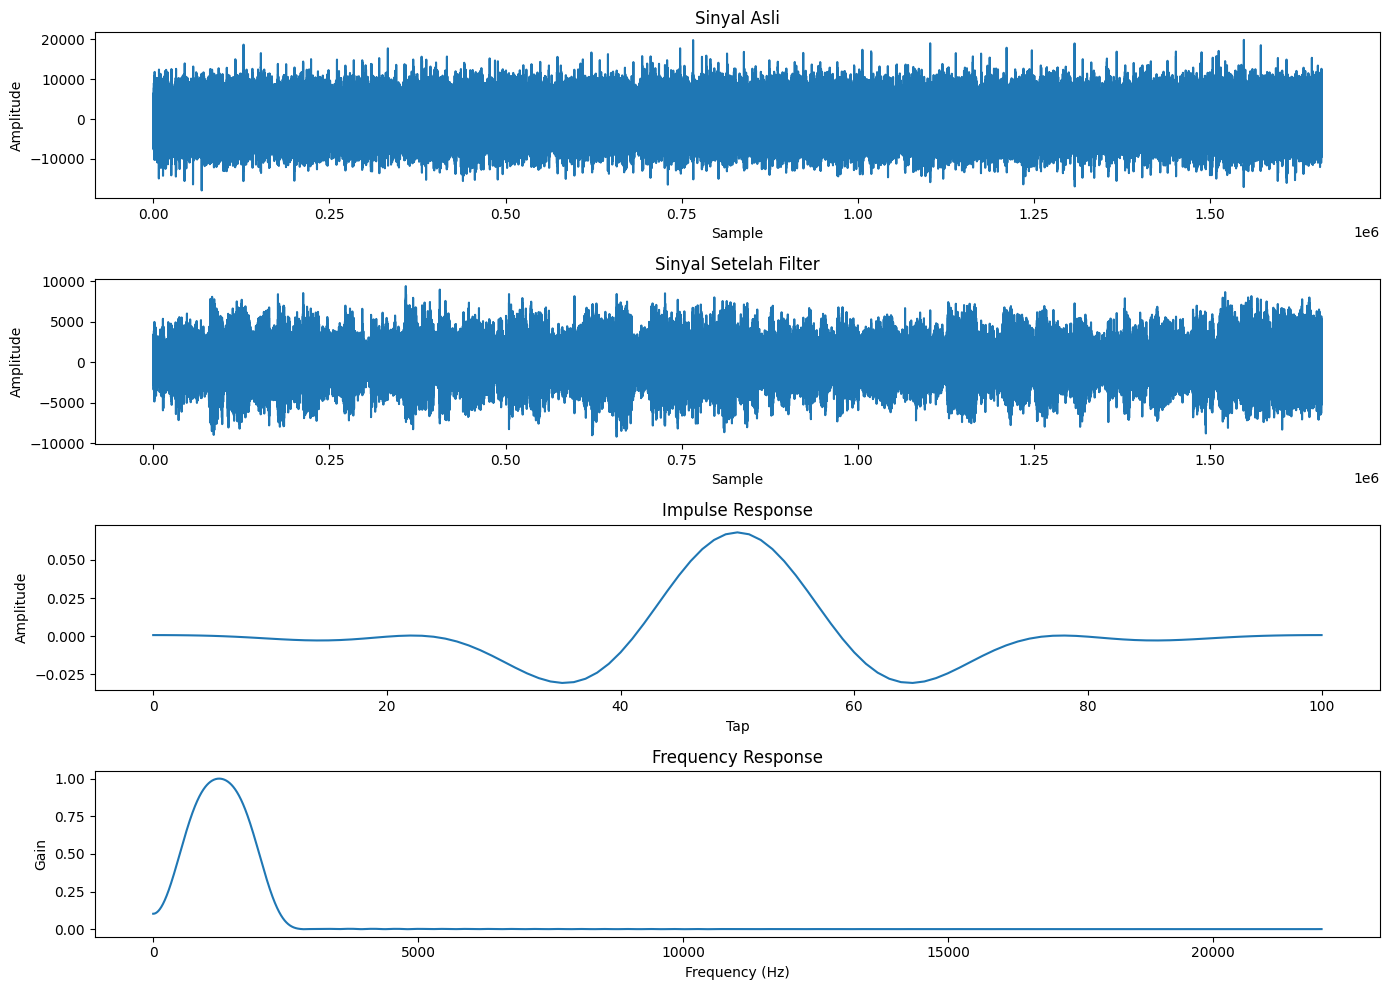

In [4]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Fungsi untuk membuat filter bandpass FIR
def design_bandpass_fir(numtaps, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    norm_lowcut = lowcut / nyquist
    norm_highcut = highcut / nyquist
    taps = signal.firwin(numtaps, [norm_lowcut, norm_highcut], pass_zero=False)
    return taps

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_FIRHamming.wav'
fs, data = wavfile.read(input_wav_path)

# Pastikan data adalah array 1D
if data.ndim > 1:
    data = data[:, 0]

# Desain filter
numtaps = 101  # Panjang filter
lowcut_freq = 500  # Frekuensi low cutoff dalam Hz
highcut_freq = 2000  # Frekuensi high cutoff dalam Hz
taps = design_bandpass_fir(numtaps, lowcut_freq, highcut_freq, fs)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(taps, 1.0, data)

# Simpan hasil sinyal terfilter ke file WAV
wavfile.write(output_wav_path, fs, filtered_data.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot impulse response
plt.subplot(4, 1, 3)
plt.plot(taps)
plt.title('Impulse Response')
plt.xlabel('Tap')
plt.ylabel('Amplitude')

# Plot frequency response
w, h = signal.freqz(taps, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()


FIR Hanning

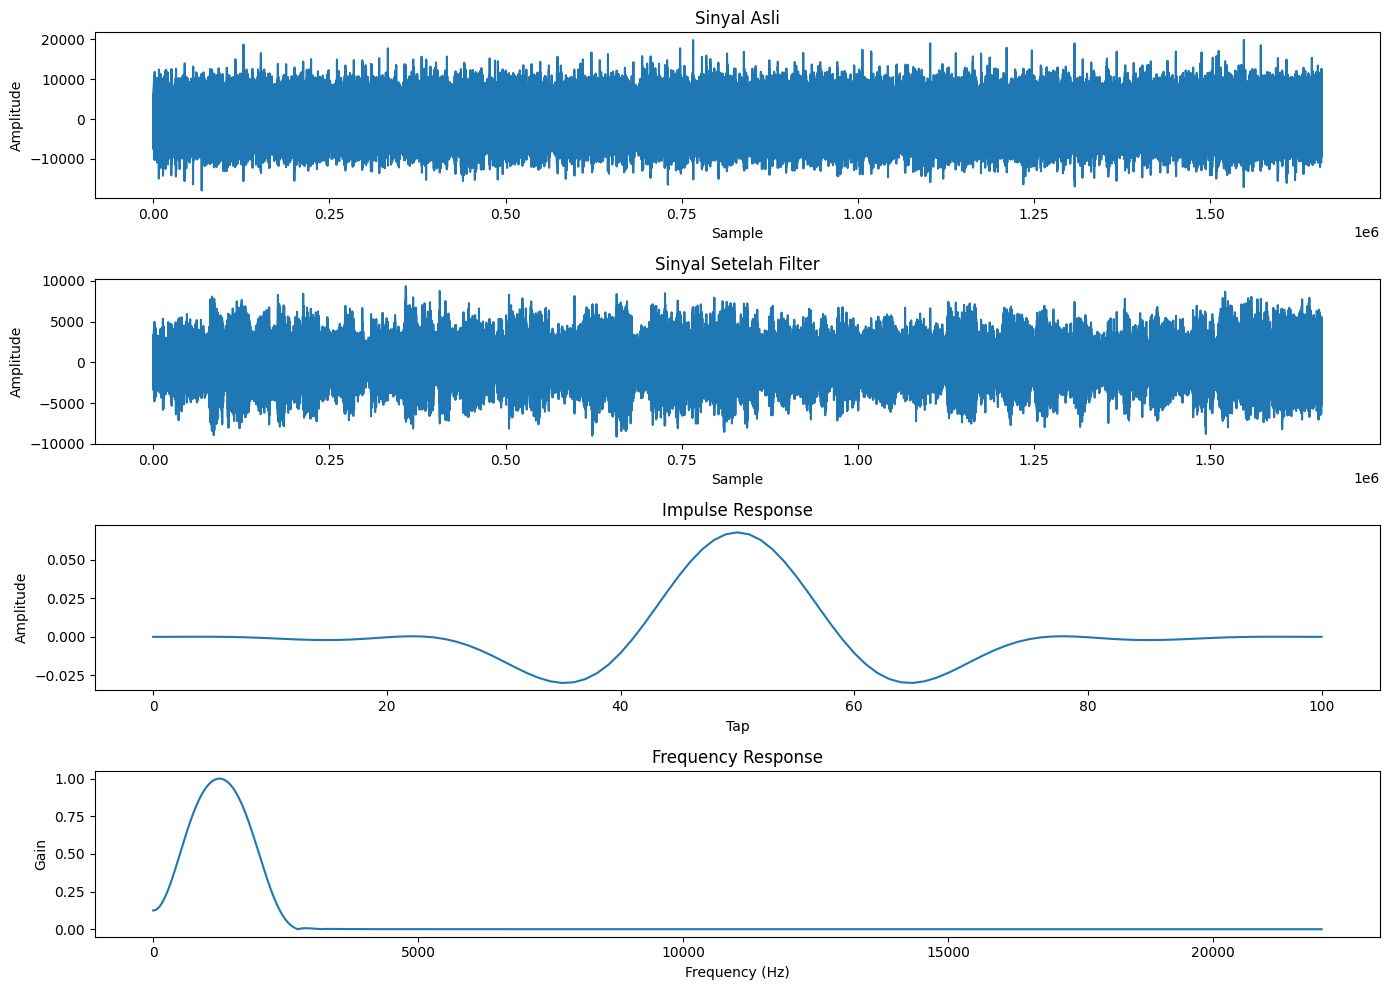

In [7]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Fungsi untuk membuat filter bandpass FIR dengan jendela Hann (Hanning)
def design_bandpass_fir_hann(numtaps, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    norm_lowcut = lowcut / nyquist
    norm_highcut = highcut / nyquist
    taps = signal.firwin(numtaps, [norm_lowcut, norm_highcut], window='hann', pass_zero=False)
    return taps

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_FIRHanning.wav'
fs, data = wavfile.read(input_wav_path)

# Pastikan data adalah array 1D
if data.ndim > 1:
    data = data[:, 0]

# Desain filter
numtaps = 101  # Panjang filter
lowcut_freq = 500  # Frekuensi low cutoff dalam Hz
highcut_freq = 2000  # Frekuensi high cutoff dalam Hz
taps = design_bandpass_fir_hann(numtaps, lowcut_freq, highcut_freq, fs)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(taps, 1.0, data)

# Simpan hasil sinyal terfilter ke file WAV
wavfile.write(output_wav_path, fs, filtered_data.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot impulse response
plt.subplot(4, 1, 3)
plt.plot(taps)
plt.title('Impulse Response')
plt.xlabel('Tap')
plt.ylabel('Amplitude')

# Plot frequency response
w, h = signal.freqz(taps, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()


FIR  Blackman

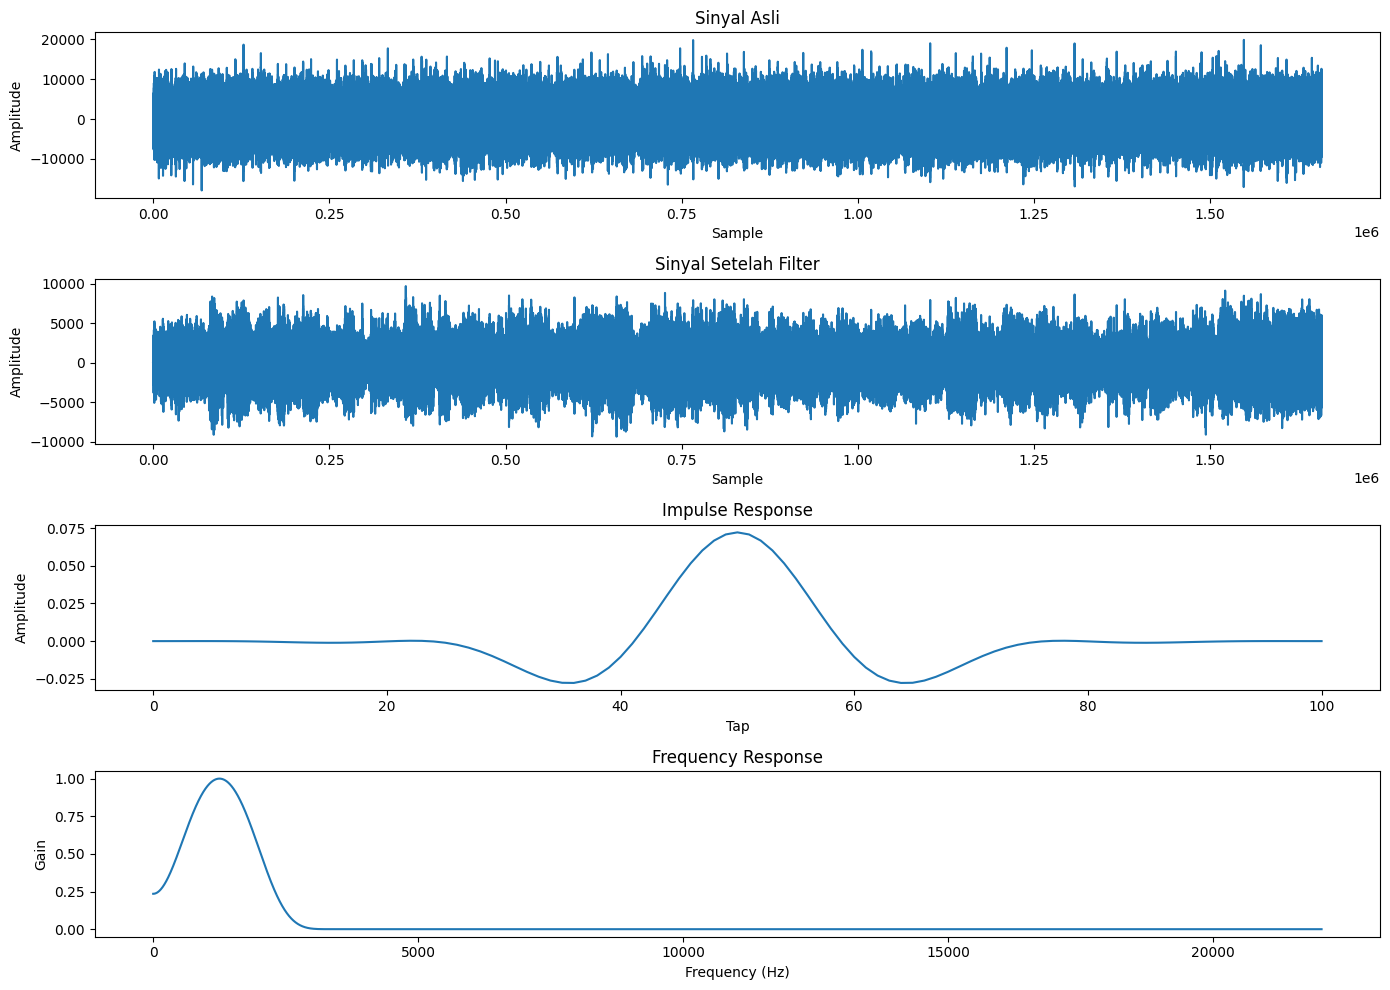

In [10]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Fungsi untuk membuat filter bandpass FIR dengan jendela Blackman
def design_bandpass_fir_blackman(numtaps, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    norm_lowcut = lowcut / nyquist
    norm_highcut = highcut / nyquist
    taps = signal.firwin(numtaps, [norm_lowcut, norm_highcut], window='blackman', pass_zero=False)
    return taps

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_FIRBlackman.wav'
fs, data = wavfile.read(input_wav_path)

# Pastikan data adalah array 1D
if data.ndim > 1:
    data = data[:, 0]

# Desain filter
numtaps = 101  # Panjang filter
lowcut_freq = 500  # Frekuensi low cutoff dalam Hz
highcut_freq = 2000  # Frekuensi high cutoff dalam Hz
taps = design_bandpass_fir_blackman(numtaps, lowcut_freq, highcut_freq, fs)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(taps, 1.0, data)

# Simpan hasil sinyal terfilter ke file WAV
wavfile.write(output_wav_path, fs, filtered_data.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot impulse response
plt.subplot(4, 1, 3)
plt.plot(taps)
plt.title('Impulse Response')
plt.xlabel('Tap')
plt.ylabel('Amplitude')

# Plot frequency response
w, h = signal.freqz(taps, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()


filter bandpass ***IIR*** Butterworth



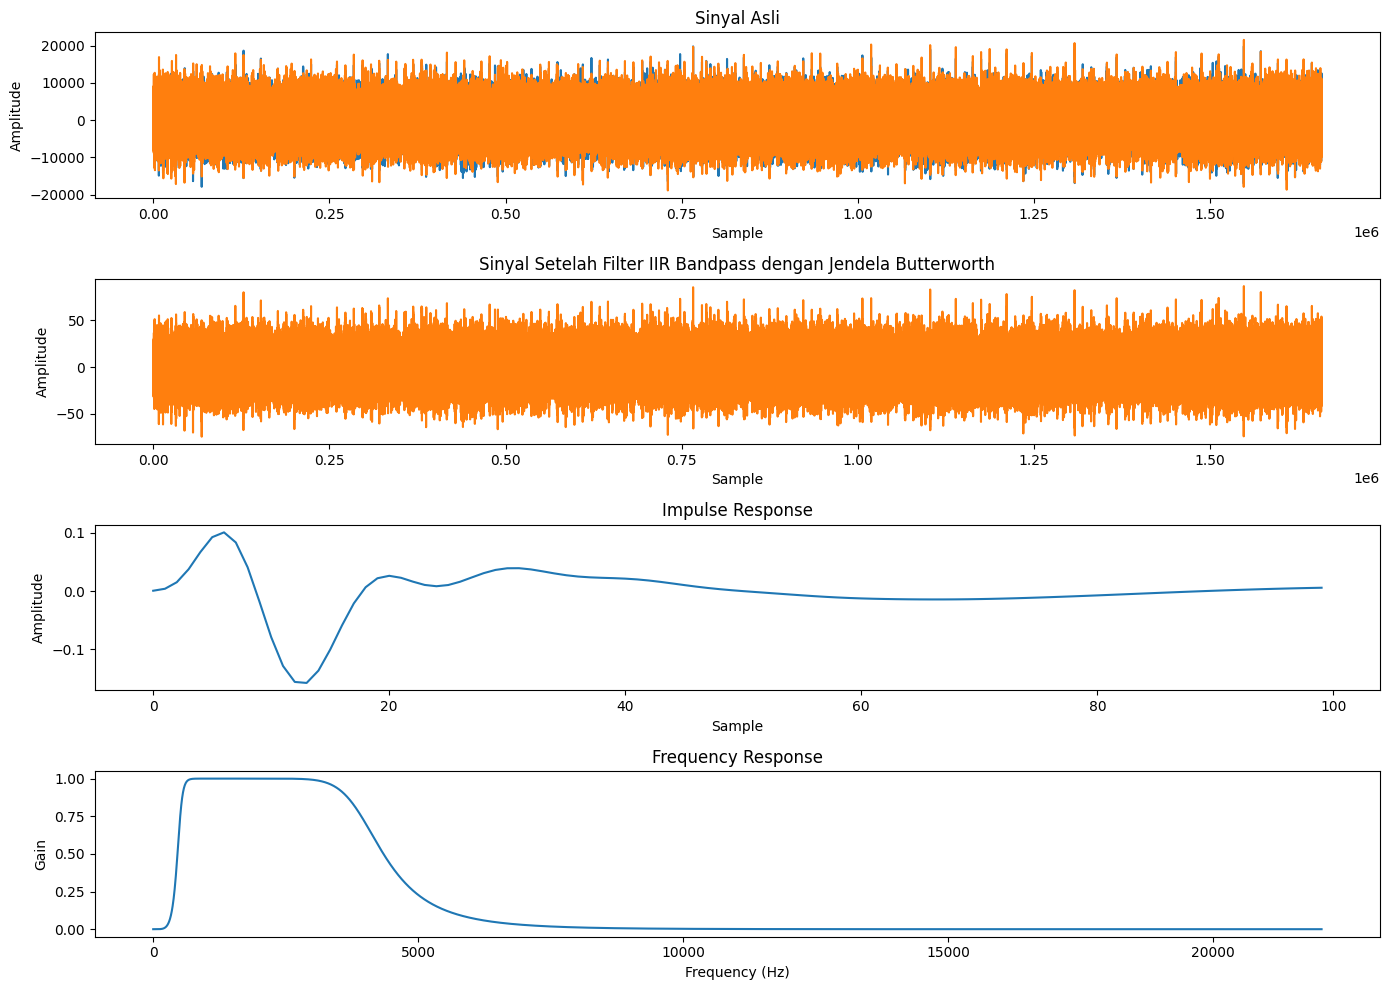

In [12]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_IIRButterworth.wav'
fs, data = wavfile.read(input_wav_path)

# Desain filter IIR bandpass Butterworth
order = 5  # Orde filter
low_cutoff_freq = 500  # Frekuensi cutoff bawah dalam Hz
high_cutoff_freq = 4000  # Frekuensi cutoff atas dalam Hz
nyquist = 0.5 * fs  # Frekuensi Nyquist
low_normalized_cutoff = low_cutoff_freq / nyquist
high_normalized_cutoff = high_cutoff_freq / nyquist

# Dapatkan koefisien filter bandpass IIR Butterworth
b, a = signal.butter(order, [low_normalized_cutoff, high_normalized_cutoff], btype='band', analog=False)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(b, a, data)

# Simpan hasil sinyal terfilter ke file WAV
# Normalisasi data hasil filtering
filtered_data_normalized = (filtered_data / np.max(np.abs(filtered_data))) * 32767
# Menyimpan data dengan format yang benar
wavfile.write(output_wav_path, fs, filtered_data_normalized.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter IIR Bandpass dengan Jendela Butterworth')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Impulse response
impulse = np.zeros(100)
impulse[0] = 1
impulse_response = signal.lfilter(b, a, impulse)
plt.subplot(4, 1, 3)
plt.plot(impulse_response)
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Frequency response
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5 * fs * w / np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()


filter IIR bandpass **Elliptic**

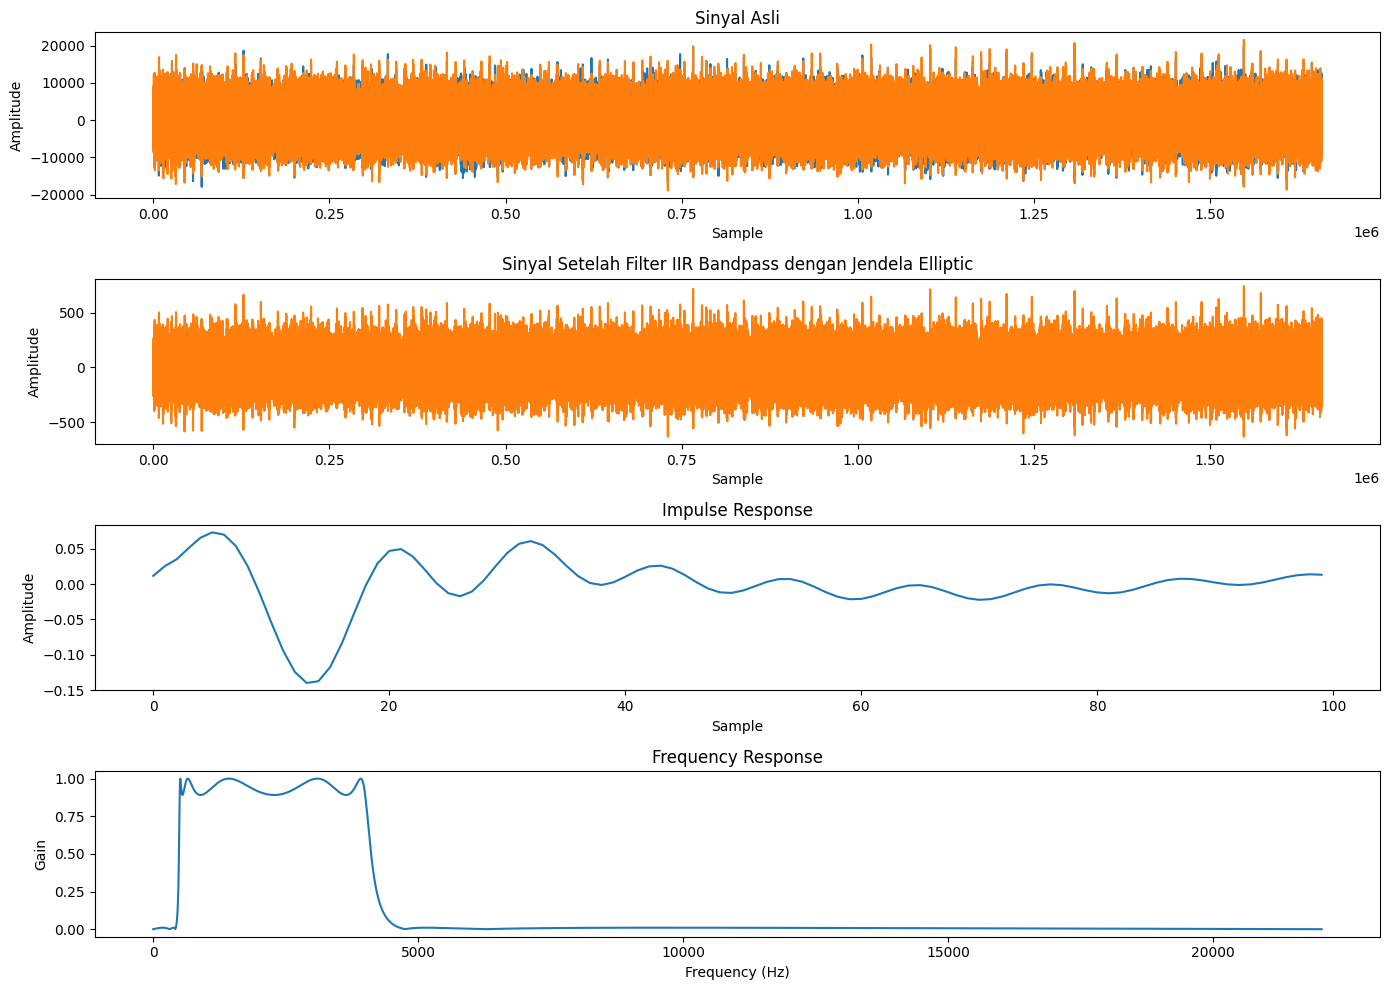

In [13]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_IIRElliptic.wav'
fs, data = wavfile.read(input_wav_path)

# Desain filter IIR bandpass Elliptic
order = 5  # Orde filter
low_cutoff_freq = 500  # Frekuensi cutoff bawah dalam Hz
high_cutoff_freq = 4000  # Frekuensi cutoff atas dalam Hz
nyquist = 0.5 * fs  # Frekuensi Nyquist
low_normalized_cutoff = low_cutoff_freq / nyquist
high_normalized_cutoff = high_cutoff_freq / nyquist

# Parameter untuk filter Elliptic
rp = 1  # Ripple maksimal dalam passband (dB)
rs = 40  # Attenuasi minimum dalam stopband (dB)

# Dapatkan koefisien filter bandpass IIR Elliptic
b, a = signal.ellip(order, rp, rs, [low_normalized_cutoff, high_normalized_cutoff], btype='band', analog=False)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(b, a, data)

# Simpan hasil sinyal terfilter ke file WAV
# Normalisasi data hasil filtering
filtered_data_normalized = (filtered_data / np.max(np.abs(filtered_data))) * 32767
# Menyimpan data dengan format yang benar
wavfile.write(output_wav_path, fs, filtered_data_normalized.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter IIR Bandpass dengan Jendela Elliptic')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Impulse response
impulse = np.zeros(100)
impulse[0] = 1
impulse_response = signal.lfilter(b, a, impulse)
plt.subplot(4, 1, 3)
plt.plot(impulse_response)
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Frequency response
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5 * fs * w / np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()


filter IIR bandpass **Chebyshev Type I**

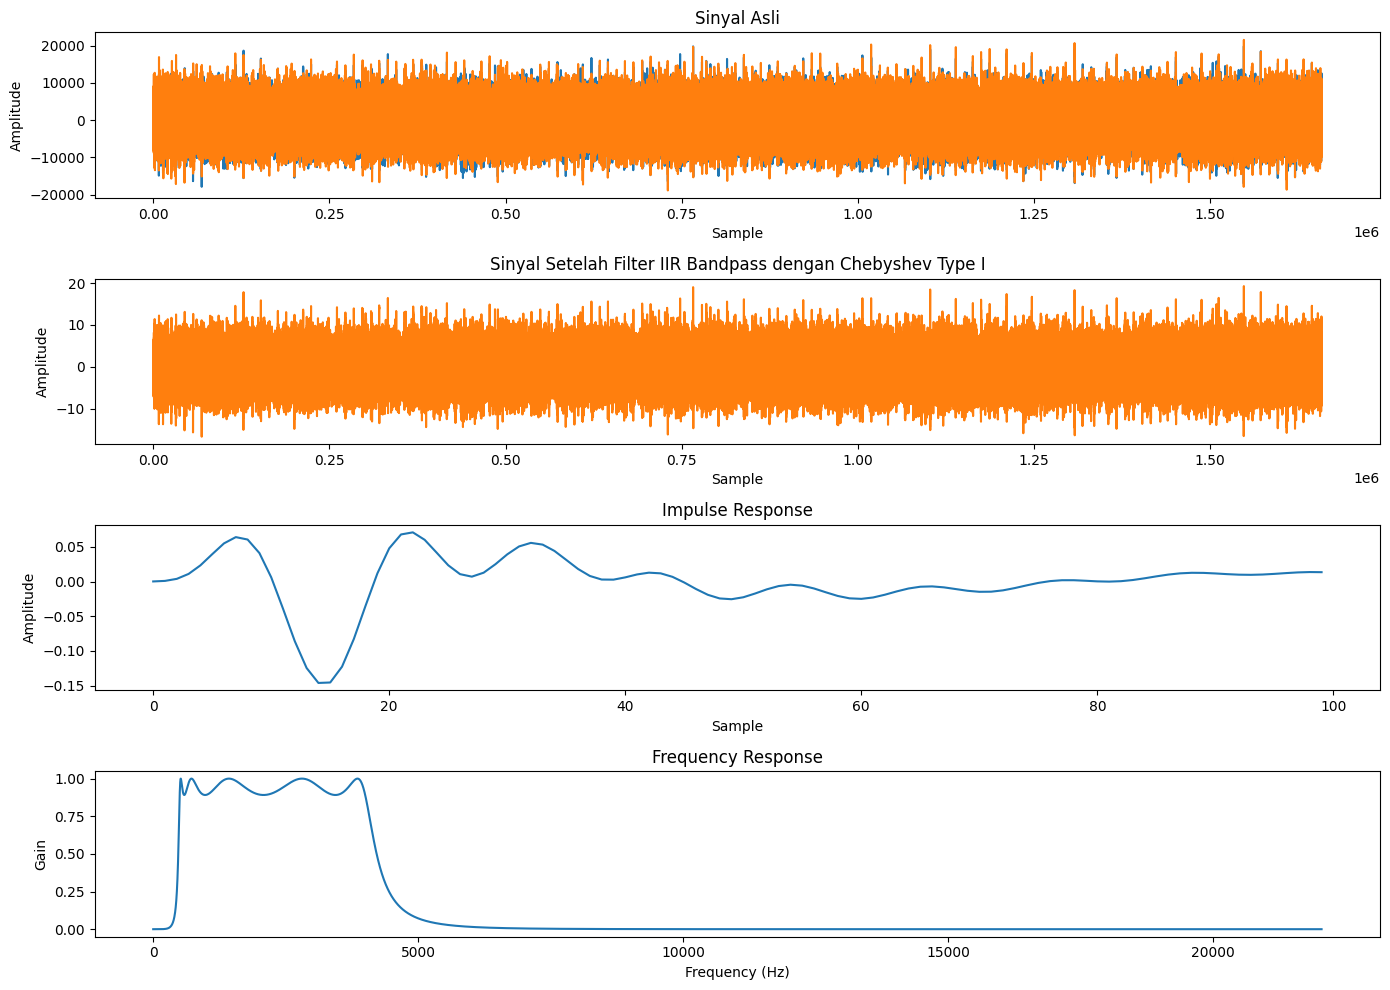

In [14]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_IIRChebyshevI.wav'
fs, data = wavfile.read(input_wav_path)

# Desain filter IIR bandpass Chebyshev Type I
order = 5  # Orde filter
low_cutoff_freq = 500  # Frekuensi cutoff bawah dalam Hz
high_cutoff_freq = 4000  # Frekuensi cutoff atas dalam Hz
nyquist = 0.5 * fs  # Frekuensi Nyquist
low_normalized_cutoff = low_cutoff_freq / nyquist
high_normalized_cutoff = high_cutoff_freq / nyquist

# Parameter untuk filter Chebyshev Type I
rp = 1  # Ripple maksimal dalam passband (dB)

# Dapatkan koefisien filter bandpass IIR Chebyshev Type I
b, a = signal.cheby1(order, rp, [low_normalized_cutoff, high_normalized_cutoff], btype='band', analog=False)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(b, a, data)

# Simpan hasil sinyal terfilter ke file WAV
# Normalisasi data hasil filtering
filtered_data_normalized = (filtered_data / np.max(np.abs(filtered_data))) * 32767
# Menyimpan data dengan format yang benar
wavfile.write(output_wav_path, fs, filtered_data_normalized.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter IIR Bandpass dengan Chebyshev Type I')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Impulse response
impulse = np.zeros(100)
impulse[0] = 1
impulse_response = signal.lfilter(b, a, impulse)
plt.subplot(4, 1, 3)
plt.plot(impulse_response)
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Frequency response
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5 * fs * w / np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()


IIR bandpass Chebyshev Type II

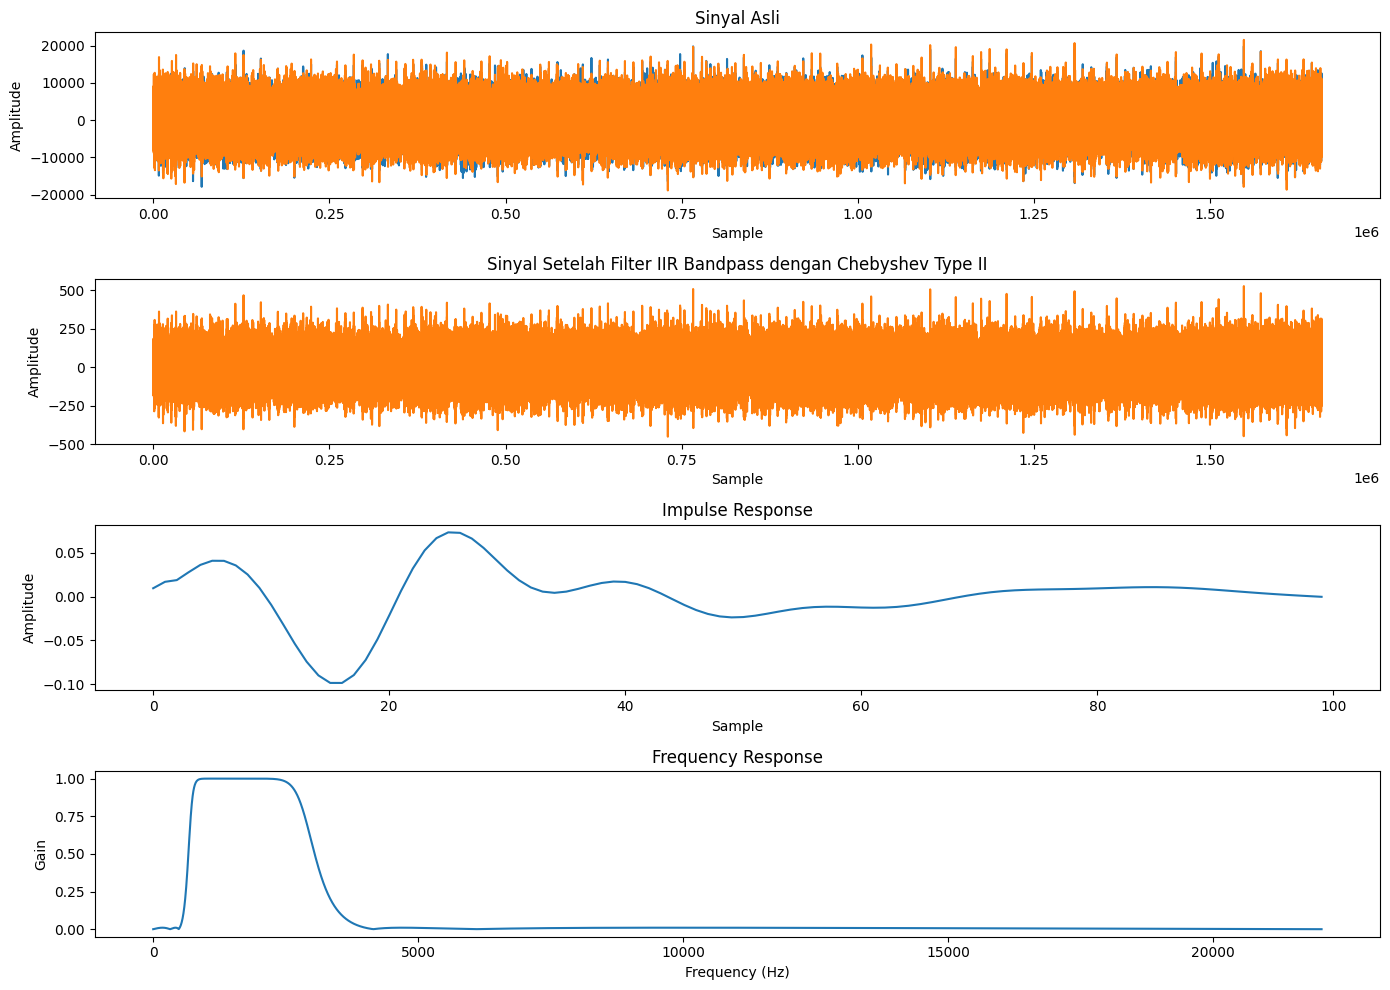

In [15]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Baca file WAV
input_wav_path = 'Av7 - Afterlife1.wav'
output_wav_path = 'output_filtered_IIRChebyshevII.wav'
fs, data = wavfile.read(input_wav_path)

# Desain filter IIR bandpass Chebyshev Type II
order = 5  # Orde filter
low_cutoff_freq = 500  # Frekuensi cutoff bawah dalam Hz
high_cutoff_freq = 4000  # Frekuensi cutoff atas dalam Hz
nyquist = 0.5 * fs  # Frekuensi Nyquist
low_normalized_cutoff = low_cutoff_freq / nyquist
high_normalized_cutoff = high_cutoff_freq / nyquist

# Parameter untuk filter Chebyshev Type II
rs = 40  # Attenuasi minimal dalam stopband (dB)

# Dapatkan koefisien filter bandpass IIR Chebyshev Type II
b, a = signal.cheby2(order, rs, [low_normalized_cutoff, high_normalized_cutoff], btype='band', analog=False)

# Terapkan filter ke sinyal
filtered_data = signal.lfilter(b, a, data)

# Simpan hasil sinyal terfilter ke file WAV
# Normalisasi data hasil filtering
filtered_data_normalized = (filtered_data / np.max(np.abs(filtered_data))) * 32767
# Menyimpan data dengan format yang benar
wavfile.write(output_wav_path, fs, filtered_data_normalized.astype(np.int16))

# Plot sinyal asli dan hasil filter
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Sinyal Asli')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(filtered_data)
plt.title('Sinyal Setelah Filter IIR Bandpass dengan Chebyshev Type II')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Impulse response
impulse = np.zeros(100)
impulse[0] = 1
impulse_response = signal.lfilter(b, a, impulse)
plt.subplot(4, 1, 3)
plt.plot(impulse_response)
plt.title('Impulse Response')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Frequency response
w, h = signal.freqz(b, a, worN=8000)
plt.subplot(4, 1, 4)
plt.plot(0.5 * fs * w / np.pi, np.abs(h))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()
